### 1W-QKD using QWs on circles & hypercubes: introduction


The first code cells are a quicker way to avoid downloading all the necessary modules every time the code is rerun from start to finish. ⚡

In [1]:
# Import qiskit, qiskit-aer, networkx, pylatexenc && pygraphviz from Google Drive
'''
from google.colab import drive
import sys
drive.mount('/content/drive')
!pip install qiskit qiskit_aer networkx pylatexenc pygraphviz --target /content/drive/MyDrive/qkd_qw_packages --upgrade
sys.path.append('/content/drive/MyDrive/qkd_qw_packages')
'''

"\nfrom google.colab import drive\nimport sys\ndrive.mount('/content/drive')\n!pip install qiskit qiskit_aer networkx pylatexenc pygraphviz --target /content/drive/MyDrive/qkd_qw_packages --upgrade\nsys.path.append('/content/drive/MyDrive/qkd_qw_packages')\n"

In [2]:
# Alternatively... (1)
!apt-get install -y graphviz graphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [3]:
# Alternatively... (2)
!pip install qiskit qiskit_aer networkx pylatexenc pygraphviz --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a9c18867f91b34

In [4]:
# Useful imports
import numpy as np
import networkx as nx
from networkx import hypercube_graph
import json
import warnings
from typing import Callable

# Qiskit components
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator

# Visualization
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_vector
from networkx.drawing.nx_agraph import graphviz_layout

# Filter all warnings from now on
warnings.filterwarnings("ignore")

### Quantum computing concepts

Quantum computing is an exciting field that leverages the principles of quantum mechanics to perform computations. By exploiting quantum phenomena such as superposition, it has the potential to solve certain problems much more efficiently than classical methods. This discussion delves into the foundational concepts that support quantum computing, starting with quantum bits (qubits), the basic units of quantum information. We will also explore the concept of superposition, a key quantum property that allows qubits to exist in multiple states simultaneously, and quantum gates, which are the building blocks of quantum circuits. Quantum gates manipulate qubits by performing operations that take advantage of quantum principles, allowing the construction of complex quantum algorithms. By examining these foundational elements, we aim to provide a clear and comprehensive understanding of the principles and potential of quantum computing, setting the stage for further exploration into this field.

#### Hilbert space

The state of a quantum system is mathematically represented within a Hilbert space, a complete vector space equipped with an inner product that allows for the definition of angles and lengths between vectors. This representation forms the mathematical framework for describing quantum states and their evolution. The inner product between two vectors $\ket{\psi}$ and $\ket{\phi}$ in the Hilbert space is defined as:

$$
\langle\psi\ket{\phi} = \sum_{i=1}^n \bar{\psi_i} \phi_i
$$

where $\psi_i$ and $\phi_i$ are the components of the vectors $\ket{\psi}$ and $\ket{\phi}$, respectively, in a chosen basis, and $\bar{\psi_i}$ denotes the complex conjugate of $\psi_i$.

In the context of quantum mechanics, it is essential to ensure that quantum state vectors are normalized, meaning their magnitude equals one. The norm of a vector, which measures its magnitude, is defined using the inner product as follows:

$$
\|\psi\| = \sqrt{\langle{\psi}\ket{\psi}}
$$

Normalization ensures that the probability interpretation of quantum mechanics holds, where the square of the magnitude of a state's component represents its likelihood (probability) of being observed in a particular basis.

#### Superposition

One of the most remarkable features of quantum systems is superposition. Unlike classical bits, which are limited to being in one of two definite states (i.e., $0$ or $1$) quantum bits, or qubits, have the ability to exist in a combination of both states simultaneously. Mathematically, superposition is described as a linear combination of basis states, where the coefficients associated with these states are complex numbers. If $\ket{\psi_1}$ and $\ket{\psi_2}$ are two basis states in a Hilbert space $\mathcal{H}$, the qubit state $\ket{\psi}$ can be expressed as:

$$
\ket{\psi} = \alpha \ket{\psi_1} + \beta \ket{\psi_2},  \: \ket{\psi} \in \mathcal{H}, \: \alpha, \beta \in \mathbb{C}
$$

Here, $\alpha$ and $\beta$ are complex probability amplitudes that determine the contribution of each basis state to the superposition. These amplitudes encode the probabilities of measuring the qubit in the corresponding basis state. A crucial requirement for a valid quantum state is the normalization condition, which ensures that the total probability of all possible measurement outcomes equals one. This condition is expressed as:

$$
\|\alpha\|^{2} + \|\beta\|^{2} = 1
$$

where $\|\alpha\|^{2}$ and $\|\beta\|^{2}$ represent the probabilities of finding the system in the states $\ket{\psi_1}$ and $\ket{\psi_2}$, respectively. The normalization ensures that the qubit state $\ket{\psi}$ is physically meaningful and adheres to the probabilistic nature of quantum mechanics.

#### Linear operators

Operating on the state of a quantum system involves applying a linear operator to the quantum state vector, which represents the system's current state in a $d$-dimensional Hilbert space $\mathcal{H}$. The quantum state vector is an element of this space, and the action of the operator transforms the state according to the rules of linear algebra. Linear operators acting on a $d$-dimensional Hilbert space can be expressed as $d \times d$ matrices, where the entries of the matrix encode the operator's effect on the basis states of the Hilbert space. These operators follow the familiar mathematical rules of matrix operations, such as addition, scalar multiplication, and matrix multiplication. For instance, combining two operators corresponds to adding or multiplying their respective matrices, depending on the desired operation. A key property of linear operators is their adherence to the linearity condition. Specifically, for an operator $A$ acting on the Hilbert space, this condition states that for any two state vectors $\ket{\psi_1}$, $\ket{\psi_2}$ and any complex scalars $\alpha$ and $\beta$, the operator satisfies:

$$
A(\alpha \ket{\psi_1} + \beta \ket{\psi_2}) = \alpha A(\ket{\psi_1}) + \beta A(\ket{\psi_2})
$$

This property ensures that the operator $A$ preserves the linear structure of the Hilbert space, making it a fundamental tool for describing transformations and dynamics in quantum systems.

#### Unitary operators

A unitary operator is a special class of linear operators that plays a fundamental role in quantum mechanics and quantum computing due to its important mathematical properties. A linear operator $A$ is said to be unitary if it satisfies the following conditions:

$$
A^\dagger A = I, \: AA^\dagger = I \\
$$

where $A^\dagger$ denotes the complex conjugate transpose (or adjoint) of $A$, and $I$ is the identity matrix. These conditions essentially ensure that the operator $A$ preserves the inner product between vectors, which is a critical feature in quantum mechanics where the evolution of quantum states must preserve their physical properties.

The significance of unitary operators can be understood through the following key aspects:

- **Orthonormality of rows and columns**: rows and columns of a unitary matrix are orthonormal vectors. This means that each row and each column of the matrix is a vector that is orthogonal to the others and has a unit norm. This property is particularly important in quantum mechanics, where unitary operators represent transformations that maintain the structure of quantum states;
- **Preservation of inner product and norm**: unitary operators preserve the inner product between two quantum states. More formally, for any two quantum states $\ket{\psi_1}$, $\ket{\psi_2}$, a unitary operator $A$ satisfies the following: $\langle\psi_1 A\ket{A \, \psi_2} = \bra{\psi_1} A^\dagger A \ket{\psi_2} = \langle\psi_1\ket{\psi_2}$

This means that the application of a unitary operator does not change the inner product between two vectors, and by extension, it also preserves the norm of quantum states. This property guarantees that the evolution of quantum systems, governed by unitary operators (such as the time evolution in quantum mechanics), is physically meaningful and consistent with the probabilistic interpretation of quantum theory.

#### Tensor product

The tensor product is a fundamental mathematical operation used to combine two quantum systems into a single, larger system. It allows for the construction of composite quantum states from individual ones. This operation is central to many aspects of quantum mechanics, especially when dealing with multi-partite quantum systems, such as entangled states in quantum information theory. Given two matrices $A$ and $B$, their tensor product, denoted $A \otimes B$, is defined as a block matrix in which each element of matrix $A$ is multiplied by the entire matrix $B$. Specifically, if $A$ is an $m \times n$ matrix and $B$ is a $p \times q$ matrix, their tensor product is an $mp \times nq$ matrix:

$$
A \otimes B = \begin{bmatrix} a_{11} B & a_{12} B & \dots & a_{1n} B \\ a_{21} B & a_{22} B & \dots & a_{2n} B \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} B & a_{m2} B & \dots & a_{mn} B \end{bmatrix}
$$

In this construction, each element $a_{ij}$ of matrix $A$ is multiplied by the entire matrix $B$, resulting in a block of the larger matrix. Similarly, when taking the tensor product of two vectors $\ket{\psi}$ and $\ket{\phi}$, where $\ket{\psi}$ has components $\psi_1, \psi_2, \dots, \psi_n$ and $\ket{\phi}$ has components $\phi_1, \phi_2, \dots, \phi_m$ their tensor product is defined as:

$$
\ket{\psi} \otimes \ket{\phi} = \begin{bmatrix} \psi_1 \\ \psi_2 \\ \vdots \\ \psi_n \end{bmatrix} \otimes \begin{bmatrix} \phi_1 \\ \phi_2 \\ \vdots \\ \phi_m \end{bmatrix} = \begin{bmatrix} \psi_1 \phi_1 \\ \psi_1 \phi_2 \\ \vdots \\ \psi_1 \phi_m \\ \psi_2 \phi_1 \\ \psi_2 \phi_2 \\ \vdots \\ \psi_2 \phi_m \\ \vdots \\ \psi_n \phi_1 \\ \psi_n \phi_2 \\ \vdots \\ \psi_n \phi_m \end{bmatrix}
$$

This operation produces a new vector whose size is the product of the dimensions of the original vectors, i.e., the resulting vector has $n \times m$ components. Each component is the product of a corresponding component from $\ket{\psi}$ and $\ket{\phi}$.


#### Common operators

In quantum computing, certain operators are used frequently due to their fundamental role in quantum state transformations. These operators manipulate qubits and are crucial for performing quantum computations. Some of the most commonly encountered operators include the Pauli operators, the Hadamard operator, and the phase operator.

The **Pauli** operators are a set of three matrices (plus the identity operator) that play a central role in quantum mechanics and quantum computing. These operators act on a single qubit and are used in many quantum algorithms. The four Pauli operators are:

- **Identity operator** $I$: this operator leaves the state of the qubit unchanged, acting as the "do-nothing" operator in quantum computing;
- **Pauli-X operator** $X$: often referred to as the quantum NOT gate, the Pauli-X operator flips the state of the qubit. It changes the state $\ket{0}$ to $\ket{1}$ and vice versa;
- **Pauli-Y operator** $Y$: this operator applies a rotation to the qubit's state by $\pi/2$ around the y-axis of the Bloch sphere. It not only flips the state but also introduces a phase factor;
- **Pauli-Z operator** $Z$: the Pauli-Z operator flips the sign of the state, introducing a phase of $-1$ for the $\ket{1}$ state while leaving the $\ket{0}$ state unchanged.

These operators are represented as matrices:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \:
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \:
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \:
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

They form the foundation for more complex quantum gates, and they are used in a wide variety of quantum algorithms and protocols, including error correction, quantum cryptography, and entanglement creation.

Another important operator is the **Hadamard** operator, which is a unitary transformation that converts the basis states $\ket{0}$ and $\ket{1}$ to two new states, $\ket{+}$ and $\ket{-}$, often referred to as the Hadamard basis. This operator is particularly important in quantum computing as it creates superpositions of states, enabling the parallelism that is a feature of quantum computation. From a mathematical perspective, it operates as follows:

$$
H\ket{0} = \ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \:
H\ket{1} = \ket{-} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

The Hadamard matrix is given by:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

The Hadamard gate is extremely useful because it transforms a computational basis state into an equal superposition of both basis states. For example, applying the Hadamard gate to the state $\ket{0}$ creates a state that has an equal probability of being measured as $\ket{0}$ or $\ket{1}$, each with a probability of 50%.

Finally, the **phase operator** is used to introduce a phase shift to the qubit's state, rotating it by $\pi/2$ around the z-axis of the Bloch sphere. This operator is important for adjusting the relative phases of quantum states, which plays a critical role in quantum interference and algorithms such as quantum phase estimation. The phase operator, often denoted by $S$, is represented as:


$$
S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \\
$$

The action of the phase operator is to multiply the $\ket{1}$ state by a factor of $i$, leaving the $\ket{0}$ state unchanged. This phase shift does not affect the probability of measuring a qubit in the computational basis, but it is essential for creating interference effects in quantum algorithms. Typically, it is used in combination with other operators to manipulate quantum states in more complex ways.





### Qubit

The qubit is the fundamental unit of quantum computation and serves as the quantum counterpart to the classical bit. However, unlike a classical bit, which can only exist in one of two states ($0$ or $1$) at a time, a qubit exhibits a unique property known as superposition. This allows a qubit to exist simultaneously in both states, $0$ and $1$, with specific complex coefficients that determine the probability amplitudes of each state when measured. Mathematically, a qubit $\ket{\psi}$ is represented as a superposition of the basis states $\ket{0}$ and $\ket{1}$, which are the computational basis states of the qubit:

$$
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \:
\ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\ket{\psi} = \alpha \ket{0} + \beta \ket{1}, \:
\alpha, \beta \in \mathbb{C}
$$

An alternative and visual representation of a qubit is the Bloch sphere. The Bloch sphere provides a geometric model for the state of a qubit as a point on the surface of a unit sphere in three-dimensional space. In this representation, any pure state of a qubit can be described by two angles, $\theta$ and $\phi$, which are defined relative to the computational basis state $\ket{0}$ and the x-axis of the sphere, respectively. The state of the qubit is then written as:

$$
\ket{\psi} = \cos \frac{\theta}{2} \ket{0} + e^{i \phi} \sin \frac{\theta}{2} \ket{1}
$$

In this expression, $\theta$ is the angle between the state vector and the z-axis, and $\phi$ is the angle in the xy-plane. As with the previous representation, this vector must also satisfy the normalization condition, ensuring the qubit remains a unit vector:

$$
\cos^2{\frac{\theta}{2}} + \sin^2 {\frac{\theta}{2}} = 1
$$

The Bloch sphere provides an intuitive way to visualize quantum operations such as rotations, which are represented by operators like the Pauli-X, Pauli-Y, and Pauli-Z gates. These gates correspond to rotations of the qubit around the axes of the Bloch sphere, allowing for transformations between different quantum states.

Let's examine the representation of $\ket{+}$  state on the Bloch sphere.

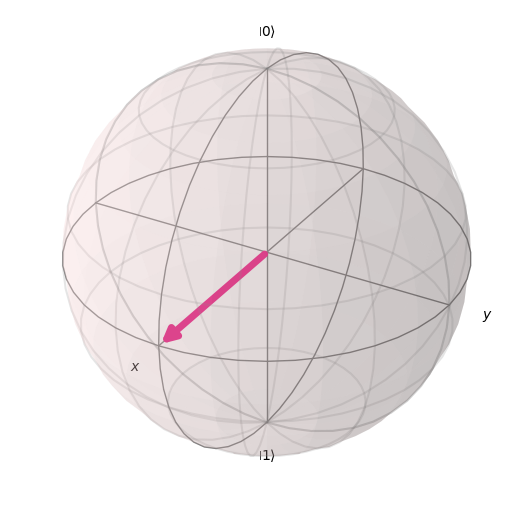

In [5]:
coords = [1, np.pi / 2, 0] # [radius, theta, phi]
# Plot Block sphere representation
plot_bloch_vector(coords, coord_type="spherical")

As shown above, on the Bloch sphere, $\ket{+}$ state corresponds to a point on the equator with $\theta = \pi/2$ and $\phi = 0$, making it a balanced superposition of $\ket{0}$ and $\ket{1}$ states.

### Quantum gates

In quantum computing, the operators discussed earlier are referred to as quantum gates. These gates are the building blocks of quantum circuits and are used to manipulate qubits by applying specific transformations. Each quantum gate is typically represented by a labeled square in circuit diagrams, where the label corresponds to the operator being applied. To understand the practical implementation of quantum gates, we can design and simulate quantum circuits using tools like **Qiskit**, an open-source quantum computing framework. Qiskit allows us to define circuits, apply quantum gates, and simulate their behavior.

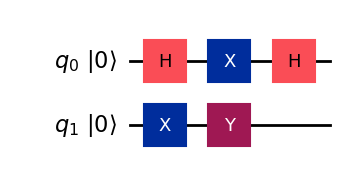

In [6]:
# Qiskit circuit example
q_circuit = QuantumCircuit(2)
q_circuit.h(0)
q_circuit.x(1)
q_circuit.x(0)
q_circuit.y(1)
q_circuit.h(0)
q_circuit.draw("mpl", initial_state=True)

In the experiment we are conducting, we begin with an initial quantum state $\ket{\psi_0}$, which is a two-qubit state:

$$
\ket{\psi_0} = \ket{0} \otimes \ket{0}
$$

This represents both qubits initialized to the computational basis state $\ket{0}$. Next, we design a quantum circuit by applying a sequence of gate operations to the qubits in a defined order. For this specific circuit, the resulting state of the system is:

$$
\ket{\psi_f} = (H \otimes I)(X \otimes Y)(H \otimes X)\ket{\psi_0}
$$

#### Controlled gates

Controlled gates are a fundamental component of quantum circuits. These gates operate conditionally, applying their effect to a target qubit only when one or more designated control qubits are in a specific state, typically $\ket{1}$. This conditional behavior enables the implementation of more complex operations and logical constructs, making controlled gates essential for quantum computation. One of the most widely used controlled gates is the **Controlled-NOT** (CNOT) gate. The CNOT gate flips the state of the target qubit (applies the Pauli-X operation) if and only if the control qubit is in the state $\ket{1}$. When expressed in matrix form, the CNOT operation is represented as:

$$
CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$$

Below there is an example of a quantum circuit in Qiskit that shows the use of controlled gates.

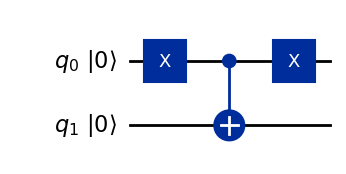

In [7]:
# Qiskit CNOT circuit
q_circuit = QuantumCircuit(2)
q_circuit.x(0)
q_circuit.cx(0, 1)
q_circuit.x(0)
q_circuit.draw("mpl", initial_state=True)

#### Quantum algorithms

In quantum computing, we utilize unitary operators to manipulate the state of qubits, transforming the quantum system in controlled ways. A quantum algorithm is essentially a structured sequence of such unitary operations, designed to evolve an initial quantum state into a final state that encodes the solution to a specific problem. Mathematically, the process can be expressed as:

$$
\ket{\psi_n} = U_n U_{n-1} \dots U_1 \ket{\psi_0}
$$

where:
- $\ket{\psi_0}$ represents the initial state of the quantum system;
- $U_1 U_2 \dots U_n$ are the sequence of unitary operators (quantum gates) that define the algorithm;
- $\ket{\psi_n}$ is the final state of the quantum system after the application of all operations.

Once the unitary operations have been applied, the result of the algorithm is obtained through a **measurement** process, collapsing the final quantum state into one of its basis states according to the associated probabilities. This measurement reveals information about the solution to the problem the algorithm was designed to solve.

### Classical Markov chains

A Markov chain can be visualized as a set of nodes connected by directed links, each associated with a probability. The transition from one node to another is stochastic and governed solely by the probability distribution of the outgoing links from the current node, a feature known as the **Markovian property**. Markov chains can be categorized as discrete or continuous, depending on whether transitions occur at distinct time steps or continuously over time. For our discussion, we will focus exclusively on discrete Markov chains. The behavior of a discrete Markov chain is encapsulated in its **transition matrix**, a square matrix where the rows and columns correspond to the nodes in the chain. Each entry in the matrix specifies the probability of transitioning from one node to another. In addition, it is fundamental in determining the probability distribution of the system after $t$ steps, achieved by raising the transition matrix to the power $t$, denoted as $P^{t}$. This iterative multiplication allows us to track how probabilities evolve over time. For example, a transition matrix for a four-node Markov chain might look like this:

$$
P = \begin{pmatrix}
0.1 & 0.4 & 0.4 & 0.1 \\
0.2 & 0.3 & 0.2 & 0.0 \\
0.6 & 0.2 & 0.1 & 0.1 \\
0.1 & 0.1 & 0.3 & 0.8 \\
\end{pmatrix}
$$

Each row in this matrix represents the probabilities of transitioning from the corresponding node to all other nodes. The sum of the probabilities in each row equals $1$, reflecting the fact that the system must pass trought to one of the available states.

Below there is an example of a classical Markov chain implemented using the NetworkX library.

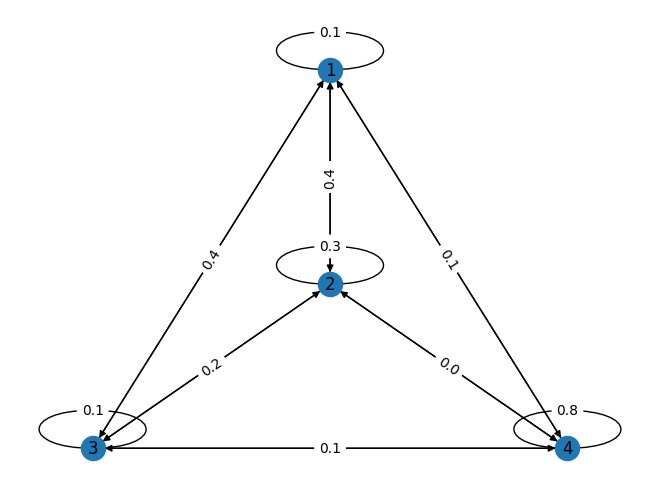

In [8]:
# Define the positions of the nodes in the graph
pos = {1: [0.75, 1.0], 2: [0.75, 0.15], 3: [0.5, -0.5], 4: [1.0, -0.5]}
# Define the transition matrix U for the directed graph
U = [[0.1, 0.2, 0.6, 0.1],
     [0.4, 0.3, 0.2, 0.1],
     [0.4, 0.2, 0.1, 0.3],
     [0.1, 0.0, 0.1, 0.8],]
# Create a directed graph using NetworkX
G = nx.DiGraph(directed=True)
for i in range(1, 5):
    G.add_node(i)
    for j in range(1, 5):
        G.add_edge(i, j, weight=U[i - 1][j - 1])
# Draw the graph
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, "weight"))
plt.show()

The following code provides a simulation of a classical random walk, where a walker takes a series of steps along a one-dimensional line. The direction of each step is determined by flipping a weighted coin with a specified probability of stepping to the right (`p`). The `random_walk` function calculates the final position of the walker after a defined number of steps (`n_steps`) starting from an initial position. Additionally, the `plot_rw_distribution` function visualizes the distribution of outcomes over multiple runs of the random walk, providing insight into the behavior of the random walk over time.

In [9]:
# Random walk definition
def random_walk(p, n_steps, initial_pos):
    """
    Run a random walk with N steps and a probability of stepping to the right of p
    Args:
    p (float): probability of stepping to the right
    N (int): number of steps
    i (int): initial position
    Returns:
    final position of the walker
    """
    position = initial_pos
    for _ in range(n_steps):
        coin_flip = list(np.random.choice(2, 1, p=[1 - p, p])) # flips our weighted coin
        position += 2 * coin_flip[0] - 1 # moves the walker according to the coin flip
    return position

In [10]:
p = 0.5 # probability of the walker stepping to the right
n_steps = 50 # number of steps the walker will take
initial_position = 0 # initial position of the walker
print(f"The walker is located at: x = {random_walk(p, n_steps, initial_position)}")

The walker is located at: x = 0


In [11]:
# Plot distribution of the random walk
def plot_rw_distribution(n_runs, n_steps):
    """
    Plot the distribution of the random walk
    Args:
    n_runs (int): number of runs
    n_steps (int): number of steps
    """
    positions = range(-1 * n_steps, n_steps + 1)
    instances = [0 for _ in range(-1 * n_steps, n_steps + 1)]
    for _ in range(n_runs):
        result = random_walk(p, n_steps, initial_position)
        instances[positions.index(result)] += 1
    # Normalize the distribution
    probabilities = [n / n_runs for n in instances]
    plt.bar(positions, probabilities)
    # Add plot styling
    plt.title("Random walk distribution", fontsize=12)
    plt.xlabel("Position", fontsize=10)
    plt.ylabel("Probability", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    # Show the plot
    plt.tight_layout()
    plt.show()

When visualized, the random walk generates the following probability distribution.

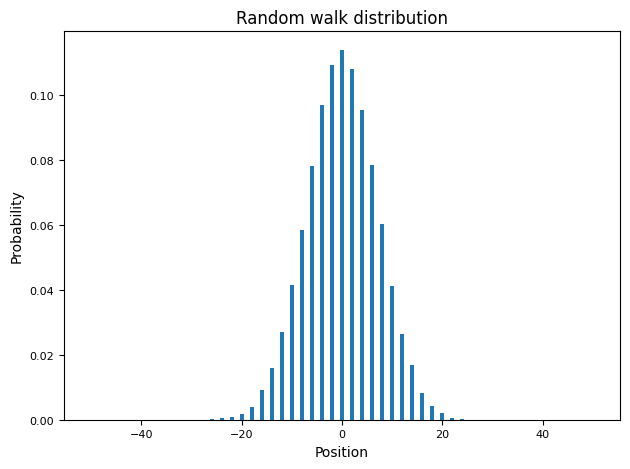

In [12]:
# Plot random walk distribution
plot_rw_distribution(n_runs=50000, n_steps=n_steps)

As seen in the plot above, the distribution follows a Gaussian shape because the random walk results from many independent steps, each contributing a small, random displacement. According to the central limit theorem, as the number of steps increases, the sum of these independent random steps leads to a normal distribution of positions.

### Quantum walk

Quantum walks serve as the quantum analog of classical Markov chains. In a classical random walk, the system takes discrete steps based on a probabilistic rule, where the future state depends only on the current state. In contrast, quantum walks exploit the principles of superposition and interference. This means that a quantum walk can explore all possible paths simultaneously, as the system exists in a superposition of all possible states. It is only upon measurement that the system collapses into one of these possible states. For instance, in a coined quantum walk, the walker's position is represented as an integer, and a "coin" determines whether the walker moves left or right.

The quantum coin walk algorithm is essentially a quantum version of the classical coin flip walk, directly adapted to utilize quantum principles. The position of the walker is encoded in an $n$-dimensional space, which has $2^{n}$ possible positions. This space is represented by the Hilbert space $\mathcal{H}_p = \{\ket{j}: j = 0, \dots, n - 1\}$, where each state corresponds to a specific position. In addition, to simulate the quantum flip of the coin (deciding whether to move left or right), we define an additional 2-dimensional Hilbert space $\mathcal{H}_c = \{\ket{i} : i = 0, 1\}$, where the two states $\ket{0}$ and $\ket{1}$ represent the two possible coin flips. The total Hilbert space of the system is the tensor product of these two spaces, $\mathcal{H} = \mathcal{H_c} \otimes \mathcal{H_p}$, where the walker's position and the coin's state are entangled. This entanglement enables the walker to be in a superposition of different positions, with the direction of movement (left or right) determined by the coin state.

Regarding the coin operator, there are various ways to represent the coin, but the most commonly used operators are:

$$
\ \\
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\\
\ \\
\ \\
G = \begin{bmatrix}
\frac{2}{n} - 1 & \frac{2}{n} & \dots & \frac{2}{n} \\
\frac{2}{n} & \frac{2}{n} - 1 & \dots & \frac{2}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{2}{n} & \frac{2}{n} & \dots & \frac{2}{n} - 1 \\
\end{bmatrix}
\ \\
$$

The Hadamard gate ($H$) creates a uniform distribution over the possible outcomes of the coin flip, meaning the walker has equal probabilities to move in either direction. On the other hand, the Grover gate ($G$) is designed to produce a skewed distribution, favoring certain directions more than others.

For what concerns the shift operator in a quantum coin walk, it is responsible for moving the walker to its next position based on the state of the quantum coin. Depending on whether the coin is in the $\ket{\downarrow}$ state (corresponding to $\ket{0}$) or the $\ket{\uparrow}$ state (corresponding to $\ket{1}$), the walker moves to the left or right, respectively. The action of the shift operator on a position and coin state can be defined as follows:

$$
S(\ket{0} \otimes \ket{j}) = \ket{0} \otimes \ket{j-1}, \:
S(\ket{1} \otimes \ket{j}) = \ket{1} \otimes \ket{j+1}
$$

Notice that the shift operator does not alter the state of the coin. It only acts on the position state, shifting it left or right based on the coin's state. This property can be formalized in the following operator construction:

$$
S = \ket{1}\bra{1} \otimes \sum_j \ket{j + 1}\bra{j} + \ket{0}\bra{0} \otimes \sum_j \ket{j - 1}\bra{j} \\
$$

This expression shows that the shift operator consists of two parts: one that shifts the position to the right when the coin is in the $\ket{1}$ state and another that shifts the position to the left when the coin is in the $\ket{0}$ state.

To summarize, the quantum walk operator is constructed by combining the coin operator and the shift operator as follows:

$$
U = S \cdot (C \otimes I)
$$

where, $S$ is the shift operator, $C$ is the chosen coin operator, and the identity operator $I$ is included to preserve the walker's state during the coin operation.

The principles underlying classical Markov chains can be directly extended to quantum walks. In a quantum walk, the evolution of the system over multiple steps is determined by repeatedly applying the quantum walk operator $U$. Specifically, to compute the state of the system after $t$ steps, the operator $U$ is applied $t$ times, resulting in $U^{t}$, which is the $t$-th power of the operator. If the initial state of the system is represented as $\ket{\psi_0}$, the state of the system after $t$ steps is expressed as:

$$
\ket{\psi(t)} = U^t\ket{\psi(0)}
$$

Now, let us consider an example of a coined quantum walk. Suppose the walker's initial position is $\ket{0}$, and a Hadamard gate is used as the coin operator, starting with the coin in the $\ket{0}$ state. The state evolution after the first step can be calculated as follows:

$$
\begin{array}{ll}
\ket{\psi(1)} &= U\ket{\psi(0)} = S \cdot (C \otimes I)\ket{\psi(0)} = S \cdot (H \otimes I)(\ket{0} \otimes \ket{0}) = S \cdot (\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \otimes \ket{0}) \\
&= (\ket{1}\bra{1} \otimes \sum_j \ket{j + 1}\bra{j})(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \otimes \ket{0}) + (\ket{0}\bra{0} \otimes \sum_j \ket{j - 1}\bra{j}) (\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \otimes \ket{0}) \\
&= \frac{1}{\sqrt{2}}\ket{1} \otimes \ket{1} + \frac{1}{\sqrt{2}}\ket{0} \otimes \ket{-1} = \frac{1}{\sqrt{2}}(\ket{1} \otimes \ket{1} + \ket{0} \otimes \ket{-1}) \\
\end{array}
$$

As demonstrated above, the Hadamard gate functions as the coin operator, generating a superposition of the coin states. Following this, the shift operator moves the walker to the corresponding positions determined by the state of the coin. The final state is a superposition of the walker located at positions $\ket{1}$ and $\ket{-1}$, weighted equally by the coefficients $1/\sqrt{2}$.

### Quantum coined walk: Qiskit implementation

To implement a quantum coined walk in a circuit, the following components are required:

- a single qubit to represent the coin: the coin states are encoded as $\ket{0}$ and $\ket{1}$, corresponding to $\downarrow$ (move left) and $\uparrow$ (move right), respectively;
- $n$ qubits to represent the walker position: with $n$ qubits, the walker can occupy $2^{n}$ distinct positions which are encoded in binary format. In this representation, the most significant bit (MSB) is positioned at the top of the qubit register. For example, a 3-qubit system could represent positions ranging from $\ket{000}$(position 0) to $\ket{111}$ (position 7);
- $n$ classical bits to store the measurement results of the walker's position: after the quantum operations are completed, measurements collapse the walker's position into a classical state, which is then stored using $n$ classical bits.

In [13]:
def coined_walk_circuit(n_qubits):
    """
    Create a quantum circuit for the quantum walk
    Args:
    n_qubits (int): number of qubits used to represent the position of the walker
    Returns:
    circuit, walker qubits, coin qubits and classical register to store the output
    """
    walker_r = QuantumRegister(n_qubits, name="q")
    coin_r = QuantumRegister(1, name="c") # coin requires only one qubit
    classic_r = ClassicalRegister(n_qubits, name="r")
    q_circuit = QuantumCircuit(walker_r, coin_r, classic_r)
    return q_circuit, walker_r, coin_r, classic_r

The initial state of the circuit is flexible and can be set arbitrarily. The coin state can be initialized as either $\ket{0}$ or $\ket{1}$, while the walker's position can be any value between $0$ and $2^{n} - 1$. However, for convenience, it is often practical to start with the walker positioned near the center of the range, at $2^{n - 1}$.

In [14]:
n_qubits = 4 # number of qubits used to represent the position of the walker
n_steps = 3 # number of steps of the quantum walk
initial_position = 2 ** (n_qubits - 1) # initial position of the walker is the middle of all possible positions
initial_coin_value = 0 # initial value of the coin is 0
n_runs = 50000 # number of runs of the quantum circuit

In [15]:
def initialize_coined_walk(q_circuit, n_qubits, walker_r, coin_r, initial_position, initial_coin_value):
    """
    Initialize the circuit with the initial position of the walker and the initial value of the coin
    Args:
    q_circuit (QuantumCircuit): quantum circuit
    n_qubits (int): number of qubits used to represent the position of the walker
    walker_r (QuantumRegister): quantum register containing the walker's position qubits
    coin_r (QuantumRegister): quantum register containing the coin qubit
    initial_position (int): initial position of the walker
    initial_coin_value (int): initial value of the coin
    Returns:
    Initialized quantum circuit
    """
    if initial_coin_value == 1:
        q_circuit.x(coin_r)
    for i in range(n_qubits):
        if initial_position & (1 << i):
            q_circuit.x(walker_r[n_qubits - i - 1])
    q_circuit.barrier()
    return q_circuit

For the coin operator, the Hadamard gate is the best choice when the initial state of the coin is unknown or cannot be inferred. It creates a superposition of states, ensuring an equal probability of moving in either direction. However, if the initial state of the coin is known, the circuit can be directly initialized to that state using $X$ gates or other appropriate operations, eliminating the need for the Hadamard gate in those cases. To complement the coin operation, the shift operator moves the walker to the appropriate position based on the state of the coin. Specifically, the shift operator must increment or decrement the walker's position depending on whether the coin is in state $\ket{1}$ or $\ket{0}$, respectively. This behavior can be implemented using an addition operator $A$, which increments the walker's position, controlled by the coin's state. Since quantum operations are unitary, constructing a corresponding subtraction operator $A^\dagger$ is straightforward once the addition operator $A$ is defined. The properties of $A$ and its adjoint $A^\dagger$ are as follows:

- $A: \mathcal{H} \to \mathcal{H}: A\ket{j} = \ket{j + 1}$ (increments the position);
- $A^\dagger$ satisfies $A^\dagger A = I$, making it unitary;
- From $A^\dagger A \ket{j} = A^\dagger \ket{j + 1}$, it follows that $A^\dagger \ket{k} = \ket{k - 1}$ (decrements the position).

These components combine to define the quantum walk operator $U$, which integrates the coin and shift operations. The quantum walk operator is expressed as:

$$
U = S \cdot (C \otimes I)
$$

In [16]:
def coined_walk_step(q_circuit, walker_r, coin_r):
    """
    Single step of the quantum walk
    Args:
    q_circuit (QuantumCircuit): quantum circuit
    walker_r (QuantumRegister): quantum register containing the walker's position qubits
    coin_r (QuantumRegister): quantum register containing the coin qubit
    Returns:
    Quantum circuit with an added walk step
    """
    # Flip the coin vector
    q_circuit.h(coin_r)
    # Implement the addition operator
    for i in reversed(range(len(walker_r))):
        # Qubits with less significant bits than the current one
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r) # coin qubit is also used as a control
        q_circuit.mcx(controls, walker_r[i]) # multi-controlled X gate
        if i != 0:
            q_circuit.x(walker_r[i]) # flip the qubit
    # Switch the coin vector
    q_circuit.x(coin_r)
    # Implement the subtraction operator
    for i in range(len(walker_r)):
        if i != 0:
            q_circuit.x(walker_r[i]) # reverse the flip
        # Qubits with less significant bits than the current one
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r) # coin qubit is also used as a control
        q_circuit.mcx(controls, walker_r[i]) # multi-controlled X gate
    # Revert the switch of the coin vector
    q_circuit.x(coin_r)
    return q_circuit

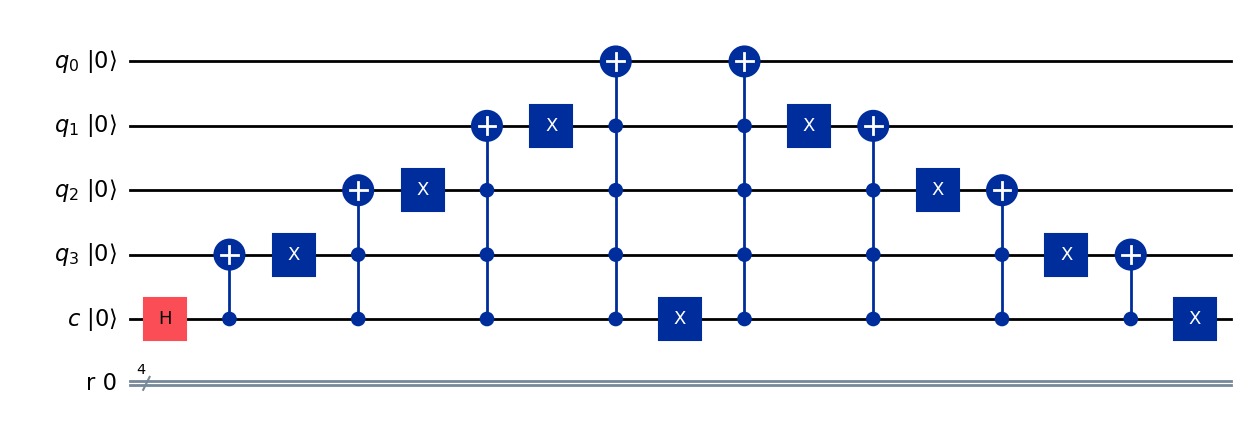

In [17]:
# Define coined walk step
q_circuit, walker_r, coin_r, _ = coined_walk_circuit(n_qubits)
q_circuit = coined_walk_step(q_circuit, walker_r, coin_r)
# Draw coined walk step
q_circuit.draw(output="mpl", initial_state=True)

With all the necessary operators defined, the circuit is constructed by repeatedly applying the single-step operator for the desired number of iterations. After completing the iterations, the walker's position is measured, and the outcome is stored in the classical bits. It is important to note that measuring the circuit after each step, collapsing its state, would reduce the process to a classical random walk.


In [18]:
def coined_walk(n_qubits, n_steps, initial_position, initial_coin_value, init_func):
    """
    Create a quantum circuit for the quantum walk
    Args:
    n_qubits (int): number of qubits used to represent the position of the walker
    n_steps (int): number of steps of the quantum walk
    initial_position (int): initial position of the walker
    initial_coin_value (int): initial value of the coin
    init_func (Callable): function used to initialize the circuit
    Returns:
    Quantum circuit for the quantum walk
    """
    q_circuit, walker_r, coin_r, classic_r = coined_walk_circuit(n_qubits)
    q_circuit = init_func(q_circuit, n_qubits, walker_r, coin_r, initial_position, initial_coin_value)
    for i in range(n_steps):
        step_gate = coined_walk_step(QuantumCircuit(walker_r, coin_r), walker_r, coin_r)
        q_circuit.append(step_gate.to_gate(label=f"Step #{i + 1}"), walker_r[:] + coin_r[:])
    q_circuit.barrier()
    q_circuit.measure(walker_r, reversed(classic_r))
    return q_circuit

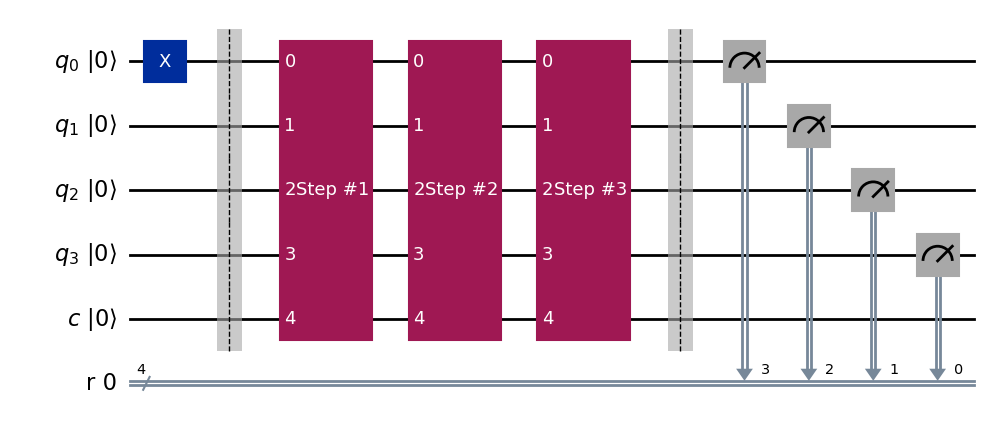

In [19]:
# Define QW circuit
q_circuit = coined_walk(n_qubits, n_steps, initial_position,
                        initial_coin_value, initialize_coined_walk)
# Draw QW circuit
q_circuit.draw(output="mpl", initial_state=True)

Unlike a classical random walk, the results of this quantum circuit exhibit a clear bias toward one side of the graph. If the initial state of the coin is inverted, the resulting distribution will also flip, reflecting the opposite bias. This behavior arises from the repeated application of the Hadamard gate, which introduces interference patterns. Depending on whether the coin begins in the state $\ket{0}$ or $\ket{1}$, these interference effects create a bias in the walker's movement, skewing the results accordingly.

In [20]:
def plot_results(q_circuit, n_runs, title):
    """
    Plot the results of the quantum walk
    Args:
    q_circuit: quantum circuit for the quantum walk
    n_runs: number of runs of the quantum circuit
    Returns:
    histogram of the results of the quantum walk
    """
    # Aer simulation
    simulator = AerSimulator()
    # Transpile before execute
    transpiled_qc = transpile(q_circuit, simulator, optimization_level=3)
    # Run and get counts
    results = simulator.run(transpiled_qc, shots=n_runs).result()
    counts = results.get_counts(transpiled_qc)
    counts = {int(k, 2): v for k, v in counts.items()}
    return plot_histogram(counts, title=title)

In [21]:
# Augmented number of steps for our simulation
n_steps = 5000
# Define QW circuit
q_circuit = coined_walk(n_qubits, n_steps, initial_position,
                        initial_coin_value, initialize_coined_walk)

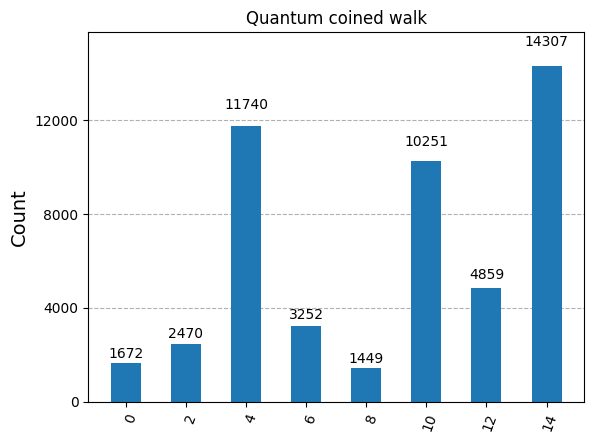

In [22]:
# Plot simulation results
plot_results(q_circuit, n_runs, "Quantum coined walk")

The above plot clearly illustrates the previously stated behavior. To provide a clearer understanding of the observed bias, let us perform some calculations to analyze it in detail. In fact, starting from the initial state $\ket{\psi(0)} = \ket{0} \otimes \ket{0}$, the first iteration of the operator will result in the state $\ket{\psi(1)} = \frac{1}{\sqrt{2}}(\ket{1} \otimes \ket{1} + \ket{0} \otimes \ket{-1})$. Going through the same process, the state after $t$ iterations will be:

$$
\begin{array}{ll}
\ket{\psi(0)} &= \ket{0} \otimes \ket{0} \\
\ket{\psi(1)} &= \frac{1}{\sqrt{2}}(\ket{1} \otimes \ket{1} + \ket{0} \otimes \ket{-1}) \\
\ket{\psi(2)} &= \frac{1}{2}(-\ket{1} \otimes \ket{-2} + (\ket{0} + \ket{1})\ket{0} + \ket{0} \otimes \ket{2}) \\
\ket{\psi(3)} &= \frac{1}{2\sqrt{2}}(\ket{1}\ket{-3} - \ket{0}\ket{-1} + (2\ket{0} + \ket{1})\ket{1} - \ket{0}\ket{3}) \\
\end{array}
$$

This few iterations are enough to see that the state is not balanced: the probability of finding the walker in the position $\ket{1}$ is $\left(\frac{2 + 1}{2\sqrt{2}}\right)^2 = \frac{5}{8}$, significantly higher compared to the probability of $\frac{1}{8}$ for all other positions.

#### Balanced coin

To eliminate this bias, we can either use a different coin operator or ensure that the initial state of the coin is set to $\frac{1}{\sqrt{2}}(\ket{0} + i \ket{1})$. In fact, it ensures balance because the relative phase $i$ between $\ket{0}$ and $\ket{1}$ offsets the interference effects caused by the Hadamard gate. When the Hadamard gate acts on this state:

$$
H(\frac{1}{\sqrt{2}}(\ket{0} + i \ket{1})) = \frac{1}{\sqrt{2}} (H \ket{0} + iH \ket{1}) = \frac{1}{2} ((\ket{0} + \ket{1}) + i(\ket{0} - \ket{1})) = \frac{1}{\sqrt{2}}(\ket{0} + i \ket{1})
$$

showing that the state remains unchanged. This balanced state prevents the skew caused by interference in the walk. To prepare it, applying a Hadamard gate followed by an $S$ gate achieves the desired $\frac{1}{\sqrt{2}}(\ket{0} + i \ket{1})$. This approach removes the bias introduced by starting with $\ket{0}$ or $\ket{1}$.

In [23]:
def initialize_balanced_coined_walk(q_circuit, n_qubits, walker_r, coin_r, initial_position, initial_coin_value):
    """
    Initialize the circuit with the initial position of the walker and the initial value of the coin
    Set the coin qubit to \ket{+} and apply the S gate to it to make sure that the coin operator keeps being balanced
    Args:
    q_circuit (QuantumCircuit): quantum circuit
    walker_r (QuantumRegister): quantum register containing the walker's position qubits
    coin_r (QuantumRegister): quantum register containing the coin qubit
    initial_position (int): initial position of the walker
    initial_coin_value (int): initial value of the coin
    Returns:
    Initialized quantum circuit
    """
    if initial_coin_value == 1:
        q_circuit.x(coin_r)
    q_circuit.h(coin_r)
    q_circuit.s(coin_r)
    for i in range(n_qubits):
        if initial_position & (1 << i):
            q_circuit.x(walker_r[n_qubits - i - 1])
    q_circuit.barrier()
    return q_circuit

In [24]:
n_qubits = 4 # number of qubits used to represent the position of the walker
n_steps = 3 # number of steps of the quantum walk
initial_position = 2 ** (n_qubits - 1) # initial position of the walker is the middle of all possible positions
initial_coin_value = 0 # initial value of the coin is 0
n_runs = 50000 # number of runs of the quantum circuit

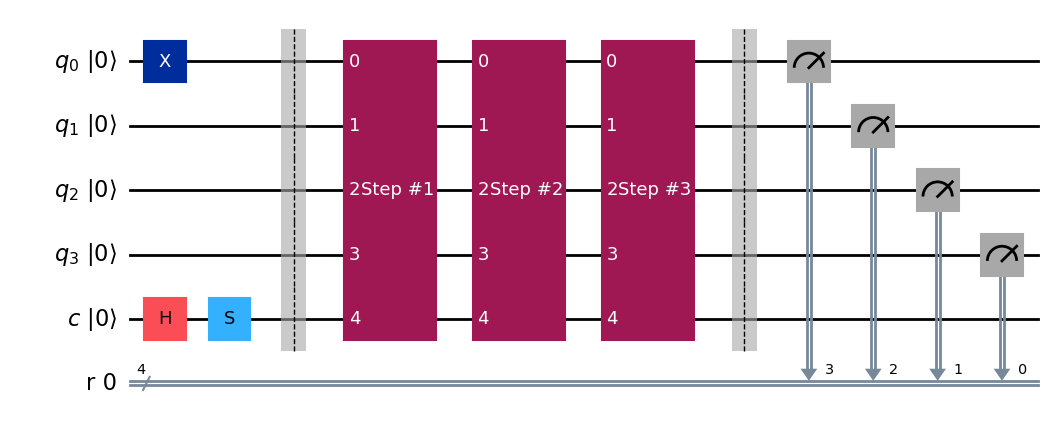

In [25]:
# Balanced QW circuit
q_circuit_b = coined_walk(n_qubits, n_steps, initial_position,
                          initial_coin_value, initialize_balanced_coined_walk)
# Draw balanced QW circuit
q_circuit_b.draw(output="mpl", initial_state=True)

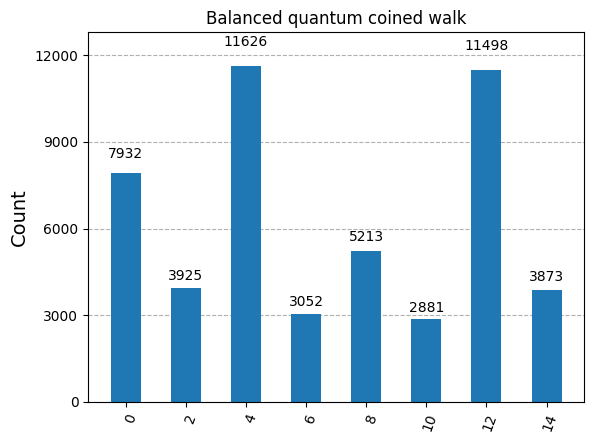

In [26]:
# Augmented number of steps for our simulation
n_steps = 1000
# Define balanced QW circuit
q_circuit_b = coined_walk(n_qubits, n_steps, initial_position,
                          initial_coin_value, initialize_balanced_coined_walk)
plot_results(q_circuit_b, n_runs, "Balanced quantum coined walk")

Using a balanced coin, leads to a less skewed distribution with reduced bias. However, achieving a distribution that is more uniform across all states requires significantly more steps $t$, as the walk needs additional time to fully explore the space and reduce the influence of initial conditions. When compared to the classical random walk, the quantum coined walk exhibits significant differences in its results, notably lacking the Gaussian properties of its classical counterpart. This divergence makes the statistical analysis of its behavior more complex. However, it can be proven that the standard deviation of the quantum walk's distribution, representing its width, grows linearly with the number of steps $t$, while the classical random walk only achieves a standard deviation of $\sqrt{t}$.

### Quantum walk on a hypercube: Qiskit implementation

The quantum random walk can be applied to explore the vertices of a hypercube, which is a highly structured graph. A hypercube of degree $n$ consists of $2^{n}$ vertices, with each vertex representing a distinct binary string of length $n$. Each vertex is connected to others that differ by exactly one bit, meaning that each vertex has $n$ neighbors. These connections form a regular graph, where the edges correspond to flipping a single bit in the binary representation of the vertices.

> _Example_
>
> A 4-dimensional hypercube consists of $2^{4} = 16$ vertices. The neighbors of the vertex $\ket{0101}$ are the vertices that differ from it by exactly one bit. These neighboring vertices are $\ket{1101}$, $\ket{0001}$, $\ket{0111}$, and $\ket{0110}$. Each of these vertices is adjacent to $\ket{0101}$ in the hypercube structure, as they can be obtained by flipping a single bit in the binary representation of $\ket{0101}$.

In the context of a quantum walk on a hypercube, the walker can move between these vertices by applying quantum operations, such as a coin operator and shift operator. The movement is governed by the superposition principle, where the walker can be in a superposition of multiple vertices at once, and measurement collapses the superposition to one of the possible vertices. The walk progresses by applying these quantum operations iteratively, exploring the vertices of the hypercube in a manner that exploits quantum interference and coherence.

Below is a hypercube graph visualized using the NetworkX tool, which helps in better understanding its structure and formation.


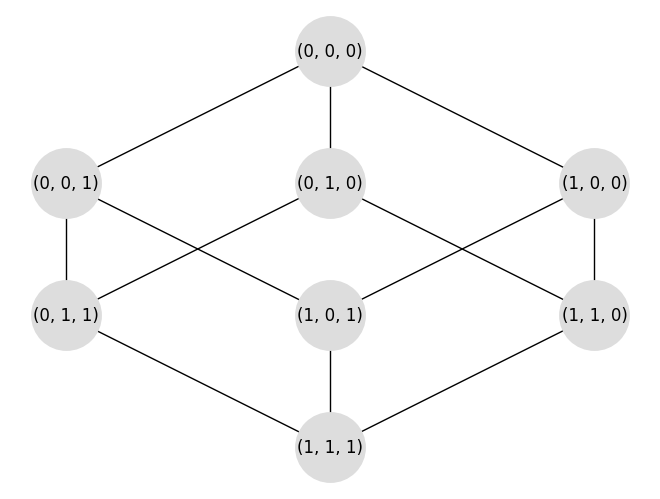

In [27]:
n = 3 # number of qubits
G = hypercube_graph(n) # create hypercube graph
# Draw graph
nx.draw(G, with_labels=True, pos=graphviz_layout(G, prog="dot"),
        node_color="#dddddd", node_size=2500)
plt.show()

The state of the system in a quantum random walk involves two distinct spaces: the coin space and the walker space. The coin space, denoted as $\mathcal{H_c} = \mathcal{H}^{n}$, corresponds to the state of the quantum coin, which can be in a superposition of $n$ possible states. The walker space, denoted as $\mathcal{H_p} = \mathcal{H}^{2^{n}}$, represents the possible positions of the walker, with each position corresponding to a binary string of length $n$, leading to $2^{n}$ distinct positions. The total state of the system is the tensor product of these two spaces: $\mathcal{H} = \mathcal{H_c} \otimes \mathcal{H_p}$. This combined space can be defined as the set of all possible states:

$$
\mathcal{H} = \{\ket{a} \otimes \ket{v}: 0 \le a \lt n, v \in \{(00 \dots 00)_2, (00\dots 01)_2, \dots, (11 \dots 11)_2\}\}
$$

where $\ket{a}$ corresponds to the coin state and $\ket{v}$ corresponds to the binary representation of the walker's position. The value of $a$ determines the position in the walker space where the next move occurs. Specifically, the value of $a$ identifies which bit in the position vector $\ket{v}$ has to be flipped. When the coin state is $\ket{a}$, the shift operator will flip the $a$-th bit of the walker's current position $\ket{v}$, thereby determining the walker's next position.

> _Example_
>
> Considering the state $\ket{a} \otimes \ket{v} = \ket{2} \otimes \ket{0101}$, the walker will transition to the node $\ket{0111}$, as the bit at position 2 is flipped.

A circuit implementing a quantum coined walk for hypercubes requires:

- $n$ qubits to represent the coin: it will generate one of the $2^n$ possible outcomes, determining which qubit to invert;
- $n$ qubits to represent the walker position: positions are encoded in binary form, with the most significant bit at the top;
- $n$ classical bits to store the measurement of the walker's position.

In [28]:
n_qubits = 2 # dimension of the hypercube
n_steps = 2 # number of steps of the quantum walk

In [29]:
def hypercube_walk_circuit(n_qubits):
    """
    Create a quantum circuit for hypercube topology
    Args:
    n_qubits (int): number of qubits used to represent the position of the walker
    Returns:
    quantum circuit for graph walk, walker register, coin register and output register
    """
    walker_r = QuantumRegister(n_qubits, name="q")
    coin_r = QuantumRegister(n_qubits, name="c")
    classic_r = ClassicalRegister(n_qubits, name="r")
    q_circuit = QuantumCircuit(walker_r, coin_r, classic_r)
    return q_circuit, walker_r, coin_r, classic_r

The theoretically optimal choice for a quantum walk on hypercubes is the Grover coin operator, $C$. It is defined as:

$$
C = \begin{bmatrix}
\frac{2}{n} - 1& \frac{2}{n} & \dots & \frac{2}{n} \\
\frac{2}{n} & \frac{2}{n} - 1& \dots &  \frac{2}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{2}{n} & \frac{2}{n} & \dots & \frac{2}{n} - 1
\end{bmatrix}
$$

However, in our case, we will observe that using a generic rotation coin is more efficient. This alternative approach will be explored later in the notebook.


In [30]:
def grover_coin(coin_r):
    """
    Create the Grover coin operator
    Args:
    coin_r (QuantumRegister): quantum register containing the coin qubit
    Returns:
    Grover coin operator
    """
    matrix_size = 2 ** len(coin_r)
    grover_matrix = np.full((matrix_size, matrix_size), 2 / matrix_size) - np.eye(matrix_size)
    return Operator(grover_matrix)

The shift operator $S$ determines how the walker moves across the hypercube based on the coin state. To formalize this, let $e_a$ represent a vector with a single $1$ in the $a$-th position and $0$ everywhere else. The shift operator $S$ is then defined as:

$$
S(\ket{a} \otimes \ket{v}) = \ket{a} \otimes \ket{v \oplus e_a}
$$

The system's state consists of two parts:
- $\ket{a}$: coin state, which determines the bit to modify. It specifies the position $a$ in the binary representation of the walker's position $\ket{v}$;
- $\ket{v}$: walker's current position, represented as a binary string corresponding to a node on the hypercube.

The walker's position is updated by flipping the bit at position $a$. This is done using the binary XOR operation ($\oplus$) between the walker's position $v$ and a vector $e_a$. As a consequence, after applying $S$, the coin state $\ket{a}$ remains unchanged, while the walker's position is updated to reflect the movement imposed by the coin.

In [31]:
def shift_operator(walker_r, coin_r):
    """
    Create a quantum circuit for the shift operator
    Args:
    walker_r (QuantumRegister): quantum register containing the walker's position qubits
    coin_r (QuantumRegister): quantum register containing the coin qubit
    Returns:
    Quantum circuit for the shift operator
    """
    q_circuit = QuantumCircuit(walker_r, coin_r)
    for i in reversed(range(len(walker_r))):
        q_circuit.mcx(coin_r, walker_r[i])
        q_circuit.x(coin_r[-1])
        for j in range(1, len(coin_r)):
            if i & ((1 << j) - 1) == 0:
                q_circuit.x(coin_r[-(j + 1)])
    return q_circuit

Finally, the quantum walk operator is constructed by combining the coin operator and the shift operator, as follows:

$$
U = S \cdot (C \otimes I)
$$

This composition integrates the coin operation, which determines the walker's direction, with the shift operation, which updates the walker's position based on the coin state.


In [32]:
def hypercube_walk_step(walker_r, coin_r):
    """
    Create a quantum circuit for one step of the hypercube walk
    Args:
    walker_r (QuantumRegister): quantum register containing the walker's position qubits
    coin_r (QuantumRegister): quantum register containing the coin qubit
    Returns:
    Quantum circuit for one step of the graph walk
    """
    shift = shift_operator(walker_r, coin_r)
    grover_c = grover_coin(coin_r)
    walk_step = QuantumCircuit(walker_r, coin_r)
    walk_step.unitary(grover_c, coin_r, label="G")
    walk_step.compose(shift, inplace=True)
    return walk_step

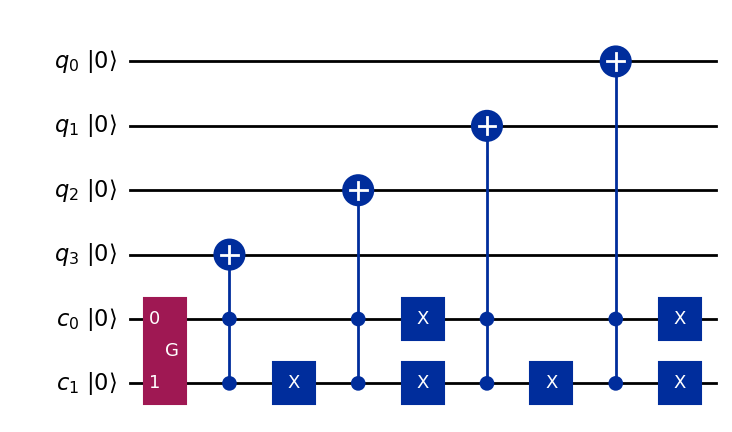

In [33]:
coin_r = QuantumRegister(n_qubits, name="c")
h_walk_step = hypercube_walk_step(walker_r, coin_r)
h_walk_step.draw(output="mpl", initial_state=True)

In [34]:
def hypercube_walk(n_qubits, n_steps):
    """
    Create a quantum circuit for the quantum walk over a hypercube
    Args:
    n_qubits (int): dimension of the hypercube
    n_steps (int): number of steps of the quantum walk
    Returns:
    Quantum circuit for the quantum walk over a hypercube
    """
    q_circuit, walker_r, coin_r, classic_r = hypercube_walk_circuit(n_qubits)
    for i in range(n_steps):
        step_gate = hypercube_walk_step(walker_r, coin_r).to_gate(label=f"Step #{i + 1}")
        q_circuit.append(step_gate, walker_r[:] + coin_r[:])
    q_circuit.barrier()
    q_circuit.measure(walker_r, reversed(classic_r))
    return q_circuit

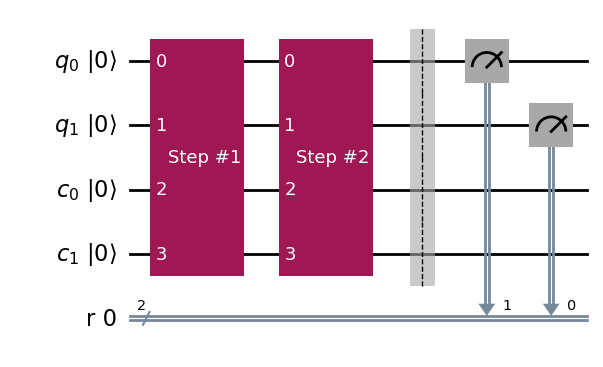

In [35]:
q_circuit = hypercube_walk(n_qubits, n_steps)
q_circuit.draw(output="mpl", initial_state=True)

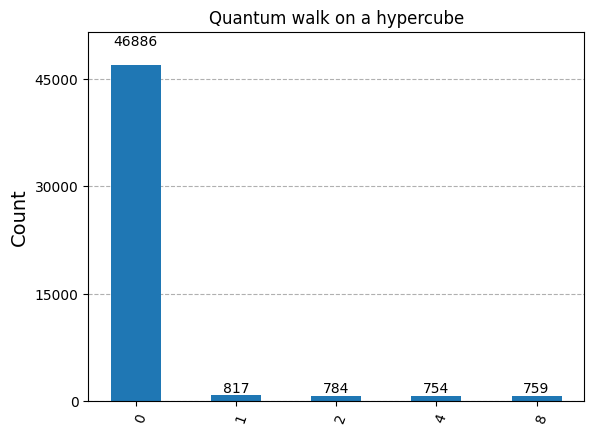

In [36]:
n_qubits = 4 # dimension of the hypercube
n_steps = 1 # number of steps of the quantum walk
n_runs = 50000 # number of runs of the quantum circuit
q_circuit = hypercube_walk(n_qubits, n_steps)
plot_results(q_circuit, n_runs, "Quantum walk on a hypercube")

As illustrated in the plot above, the probability distribution across all states is noticeably biased, a result heavily influenced by the specific initial state of the hypercube. This bias primarily derives from the properties of the Grover coin. In fact, it amplifies certain probabilities based on the structure of the graph and the initial state, leading to uneven distributions. In the context of our QW on the hypercube for constructing a secure QKD protocol, this characteristic poses a significant problem. A highly biased distribution makes the system more predictable and, consequently, more vulnerable to eavesdroppers. The greater the bias, the easier it is for an adversary to infer critical information about the system, compromising its security. For this reason, we will explore alternative coin operators in our QW hypercube construction. By choosing a coin operator that ensures a more uniform and balanced distribution, we can enhance the security of the protocol and mitigate potential vulnerabilities.

### QW on a circle with a predefined number of positions $2P$

In the circle scenario, the walker moves along discrete positions on a circle. The Hilbert space $H$, which describes the QW, is the tensor product of the position Hilbert space $H_p$ and the coin Hilbert space $H_c$, i.e., $H = H_p \otimes H_c$. The position Hilbert space $H_p$ is spanned by points on a circle, denoted as $\{\ket{x}: \, x \in \{0, \dots, P - 1\} \}$, where $P$ is the total number of discrete positions. The coin Hilbert space $H_c$ is spanned by the two possible coin states $\{\ket{R}, \: \ket{L}\}$, representing heads and tails, respectively. The evolution of the QW for one step is governed by the unitary operator:

$$
U = S \cdot (R_c \otimes I_p)
$$

where $I_p$ is the identity operator in $H_p$, and $R_c \in SU(2)$ is a rotation in $H_c$. In its generical matrix form, $R_c$ can be written as:

$$
R_c(\phi, \theta) = \begin{bmatrix} e^{i \phi} \cos(\theta) & e^{i \phi} \sin(\theta) \\ -e^{-i \phi} \sin(\theta) & e^{-i \phi} \cos(\theta) \end{bmatrix}
$$

where $\phi$ denotes the phase angle of the rotation, and $\theta$ represents the actual rotation angle.

The shift operator $S$ moves the walker one position to the right or left on the circle, based on its coin state. Explicitly, $S$ is defined as:

$$
S = \sum_{x=0}^{P-1} \left(\ket{x + 1 \ (\text{mod} \ P)} \bra{x} \otimes \ket{R} \bra{R} + \ket{x - 1 \ (\text{mod} \ P)} \bra{x} \otimes \ket{L} \bra{L}\right)
$$

This operator shifts the walker either clockwise or counterclockwise, depending on the coin state. Since the walker is on a circle, position $P$ is identified with position $0$, creating a continuous loop of discrete steps.

For the QKD protocol under consideration, we aim to apply an $F$ operator before evolving the walk. This operator functions as a coin flip (i.e., Pauli-X, Pauli-Y, or identity) acting solely on the coin space, with the resulting final state $\ket{\psi(t)}$ defined as:

$$
\ket{\psi(t)} = U^{t} \cdot (F \otimes I_p) \ket{\psi_0}
$$

where $\ket{\psi_0}$ is the initial state of our protocol.

As outlined in [B. L. Douglas et al.](https://arxiv.org/abs/0706.0304), we can construct the QW on a circle using the same approach discussed earlier. However, there are critical differences to consider when applying this method to our QKD protocol. Unlike the general QW setup, where states can be initialized in superposition for broader explorations, our protocol requires precise initialization of the states to align with its security objectives. Specifically, the walker states must be initialized using $X$ gates applied in a controlled manner to set them appropriately for the protocol's requirements. Similarly, the coin operator cannot be a generic superposition like a Hadamard gate; instead, it must use the generic coin rotation operator, tailored and parameterized for the desired behavior in the QKD protocol.

The following presents the implementation of the QW on a circle, specifically customized to align with the requirements of our QKD protocol.

In [37]:
class QW_Circle:
    def __init__(self, P, t, initial_position=0, F='I', phi=0, theta=np.pi/4):
        """
        Quantum walk on a circle with 2P positions
        Args:
        P (int): base number of positions on the circle (must be odd); the total number of positions is 2P
        t (int): number of steps to perform in the walk
        initial_position (int): initial position of the walker
        F (string): F operator type. Choose 'I', 'X', or 'Y'
        phi (float): phase angle for the coin rotation operator
        theta (float): rotation angle for the coin rotation operator
        """
        self.P = P
        self.t = t
        self.initial_position = initial_position
        self.F = F
        self.phi = phi
        self.theta = theta
        self.n_walker_qubits = int(np.ceil(np.log2(2 * self.P))) # number of qubits for the walker
        # Create quantum and classical registers
        self.walker_r = QuantumRegister(self.n_walker_qubits, 'q')
        self.coin_r = QuantumRegister(1, 'c')
        self.classic_r = ClassicalRegister(self.n_walker_qubits, 'r')
        # Initialize the quantum circuit
        self.circuit = QuantumCircuit(self.walker_r, self.coin_r, self.classic_r)
        # Build the QRW circuit
        self._build_circuit()

    def _build_circuit(self):
        """
        Build the quantum random walk circuit with the specified parameters
        """
        # Initialize the walker and coin qubits
        self._initialize_circuit()
        # Apply F operator before evolving the walk
        self._apply_F()
        # Add a barrier for clarity
        self.circuit.barrier()
        # Perform the specified number of walk steps
        for step in range(self.t):
            # Apply the coined walk step
            self.circuit = self._coined_walk_step(self.circuit, self.walker_r, self.coin_r)
        # Add a barrier for clarity
        self.circuit.barrier()
        # Add measurement operations
        self.circuit.measure(self.walker_r, reversed(self.classic_r))

    def _initialize_circuit(self):
        """
        Initialize the circuit with the initial position of the walker
        """
        # Set the walker to the initial position (in the range 0 to 2P - 1)
        for i in range(self.n_walker_qubits):
            if self.initial_position & (1 << i): # check if bit i is set in initial_position
                self.circuit.x(self.walker_r[self.n_walker_qubits - i - 1])
        self.circuit.barrier()

    def _apply_F(self):
        """
        Apply operator F to the coin qubit at the end of the walk
        """
        if self.F == 'I':
            pass # identity operation, do nothing
        elif self.F == 'X':
            self.circuit.x(self.coin_r)
        elif self.F == 'Y':
            self.circuit.y(self.coin_r)
        else:
            raise ValueError("Invalid operator type. Choose 'I', 'X', or 'Y'")

    def coin_rotation_operator(self, coin_r):
        """
        Create a quantum circuit for the coin rotation operator
        """
        # Create a quantum circuit for the coin rotation operator
        q_circuit = QuantumCircuit(len(coin_r))
        # Apply the rotation to each coin qubit
        for qubit in range(len(coin_r)):
            q_circuit.u(self.theta, self.phi, 0, qubit)
        # Convert the circuit to an operator
        coin_rotation_operator = Operator(q_circuit)
        return coin_rotation_operator

    def _coined_walk_step(self, q_circuit, walker_r, coin_r):
        """
        Single step of the quantum walk
        Args:
        q_circuit (QuantumCircuit): quantum circuit
        walker_r (QuantumRegister): quantum register containing the walker's position qubits
        coin_r (QuantumRegister): quantum register containing the coin qubit
        Returns:
        Quantum circuit with an added walk step
        """
        # Apply the coin rotation (U3 gate)
        coin_operator = self.coin_rotation_operator(coin_r)
        q_circuit.unitary(coin_operator, coin_r, label="R")
        # Shift operations
        # Right shift (coin is \ket{1}) or left shift (coin is \ket{0})
        for i in reversed(range(len(walker_r))):
            controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)] # controls are higher bits
            controls.append(coin_r) # coin qubit as control
            q_circuit.mcx(controls, walker_r[i]) # multi-controlled X gate for shift
            if i != 0:
                q_circuit.x(walker_r[i]) # flip the qubit if necessary
        # Revert the coin state for left shift (subtraction)
        q_circuit.x(coin_r)
        for i in range(len(walker_r)):
            if i != 0:
                q_circuit.x(walker_r[i]) # reverse the flip
            controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)] # controls for the next shift
            controls.append(coin_r) # coin qubit as control
            q_circuit.mcx(controls, walker_r[i]) # multi-controlled X gate for left move
        # Revert the coin qubit flip after the subtraction operation
        q_circuit.x(coin_r)
        return q_circuit

    def draw_circuit(self):
        """
        Draw the quantum circuit
        """
        return self.circuit.draw("mpl")

    def plot_states_hist(self, shots=50000, title=None):
        """
        Plot a histogram of measurement results for QW states
        Args:
        shots (int): number of circuit executions
        title (str): title for the histogram
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        job = simulator.run(self.circuit, shots=shots)
        results = job.result()
        counts = results.get_counts()
        # Plot histogram
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_histogram(counts, title=title or f'QW results (P={self.P})', sort='value_desc', ax=ax)
        ax.set_xlabel('Measured states')
        ax.set_ylabel('Counts')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def execute(self):
        """
        Execute the circuit once and return a result state
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        results = simulator.run(self.circuit, shots=1).result()
        answer = results.get_counts()
        state = list(answer.keys())[0]
        return state

    def get_probabilities(self, shots=50000):
        """
        Get the probability distribution
        Args:
        shots (int): number of circuit executions
        Returns:
        dict: probability distribution of states
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        results = simulator.run(self.circuit, shots=shots).result()
        counts = results.get_counts()
        probabilities = {}
        total = sum(counts.values())
        for state, count in counts.items():
            probabilities[state] = count / total
        return probabilities

Let's explore an example to verify if our concept is implemented correctly. In this context, the probability distribution across the possible states is initially biased with a low number of steps ($t$), resulting in a skewed outcome. However, as $t$ increases, the distribution approaches uniformity, which is crucial for achieving a secure QKD protocol by ensuring that the key exchange is resistant to eavesdropping.

In [38]:
# Simulations parameters
shots = 100000

In [39]:
# Test QW on a circle with 2P positions
qw_c = QW_Circle(P=3, t=1, initial_position=2, F='Y', phi=0, theta=np.pi/4)

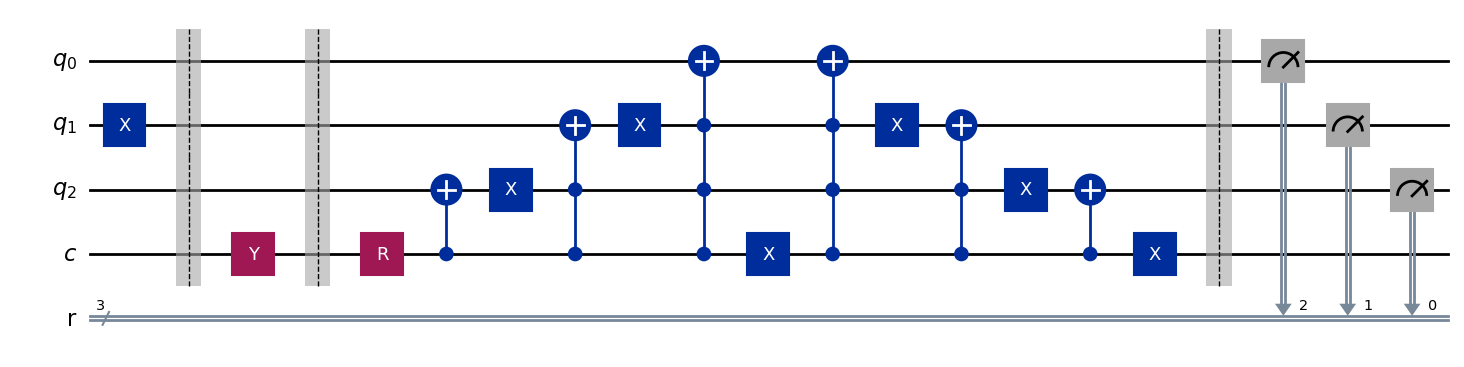

In [40]:
# Test circuit drawing
qw_c.draw_circuit()

In [41]:
# Test probability distribution
print("Probability distribution:")
probs = qw_c.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
001: 0.1466
011: 0.8534


As we can see from the above results, with a low number of steps, the quantum walk is biased towards the initialization state, making it unsuitable for generating a reliable quantum walk for a QKD protocol. 😔

In [42]:
# Test probability distribution with a higher number of steps
qw_c = QW_Circle(P=3, t=600, initial_position=2, phi=0, theta=np.pi/4, F='Y')
print("Probability distribution:")
probs = qw_c.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
100: 0.2060
110: 0.2463
000: 0.3006
010: 0.2471


Instead, with a higher number of steps, the probability distribution becomes less biased, which is an optimal result. This indicates that the approach is valid for constructing quantum walks for a secure QKD protocol. 🎉

Let us now examine the paper of [C. Vlachou et alt.](https://arxiv.org/abs/1710.07979), where simulations of a QW on a circle are initially conducted to determine the $c$ parameter as $P$ varies.

In fact, to demonstrate the security of 1W-QKD, we will construct an equivalent entanglement-based protocol, as is commonly done. Proving the security of this protocol will also validate the security of the prepare-and-measure version. The equivalence between entanglement-based and prepare-and-measure QKD protocols was firstly introduced by [C. H. Bennett et alt.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.68.557). Since then, the connection between entanglement (specifically, the ability to certify or distill it) and the security of prepare-and-measure QKD protocols has been extensively explored. A frequent method for proving the security of prepare-and-measure QKD protocols, including those presented in this notebook, involves considering an equivalent entanglement-based protocol.

Even in cases where the devices are untrusted (as in device-independent QKD), security holds under certain assumptions about the devices. For the entanglement-based protocol, in each of the $N$ iterations, we modify steps (1) and (2) as follows:

- **New step (1)**: Alice prepares the entangled state:
  $$
  \ket{\Psi_0} = \frac{1}{\sqrt{2P}} \sum_{i=0}^{2P-1} \ket{i, i}_{AB}
  $$

  which resides in a $4P^2$-dimensional Hilbert space, $(H_p \otimes H_c)^2$. Alice sends Bob the second half (the Bob portion) of $\ket{\Psi_0}$ while keeping the first half (the Alice portion) in her private lab;

- **New step (2)**: Alice and Bob independently choose two random bits, $w_A$ and $w_B$. If $w_A = 0$, Alice measures her half of the entangled state in the computational $Z$ basis; otherwise, she measures in the QW basis. Bob similarly measures his half according to $w_B$. Their measurement outcomes are recorded as $i_A$ for Alice and $j_B$ for Bob.

Next, we prove the security of this entanglement-based protocol by initially making three assumptions:

- $A_1$: Alice and Bob only use iterations where $w_A = w_B = 0$ for their raw key;
- $A_2$: Eve is limited to collective attacks, where she independently attacks each protocol iteration but can perform a joint measurement of her ancilla at any future time;
- $A_3$: Eve prepares the states that Alice and Bob hold.

Assumption $A_1$ simplifies computation and can be discarded later; alternatively, Alice and Bob may bias their basis choice to make $w_A = w_B = 0$ more likely, as done in the BB84 protocol. Assumption $A_2$ can be removed later using a de Finetti argument, yielding security in the asymptotic limit without degrading the key-rate. Assumption $A_3$ grants more power to Eve; if security is shown with $A_3$, it holds even when $A_3$ is removed.

Given $A_2$ and $A_3$, Alice, Bob, and Eve, after $N$ iterations, share a quantum state $\rho_{ABE}^N$, where $\rho_{ABE} \in H_A \otimes H_B \otimes H_E$ with $H_A \simeq H_B \simeq H_p \otimes H_c$. Eve, as an all-powerful adversary, has no constraints on her Hilbert space $H_E$. After error correction and privacy amplification, Alice and Bob share a secret key of size $\ell(N)$. Under collective attacks, the Devetak-Winter key-rate expression can compute:

$$
r = \lim_{N \to \infty} \frac{\ell(N)}{N} = S(A|E) - H(A|B)
$$

Let $A_z$ and $A_w$ be random variables representing Alice's system when measured in the $Z$ or QW basis, respectively, with $B_z$ and $B_w$ defined similarly for Bob. Under $A_1$, we seek:

$$
r = S(A_z|E) - H(A_z|B_z)
$$

Computing $H(A_z|B_z)$ is straightforward, given the probabilities:

$$
p_{i,j}^z = \mathbb{P}(i_A = i, \: j_B = j | w_A = w_B = 0)
$$

The challenge lies in bounding the von Neumann entropy $S(A_z|E)$. For this, we use an uncertainty relation from which, given any density operator $\rho_{ABE}$ on $H_A \otimes H_B \otimes H_E$, and measurements using POVMs $M_0 = \{ M_x^{(0)} \}_x$ or $M_1 = \{ M_x^{(1)} \}_x$:

$$
S(A_0|E) + H(A_1|B) \geq \log \frac{1}{c}
$$

where $c = \max_{x,y} \| M_x^{(0)} M_y^{(1)} \|_\infty^2$; we define $\| \cdot \|_\infty$ as the operator norm, with $A_i$ representing the random variable that describes Alice's system after applying the measurement $M_i$. We will define $B_i$ similarly for Bob's system. Assuming measurements $M_0$ are used for key distillation, provides the Devetak-Winter key rate:

$$
r = S(A_0|E) - H(A_0|B_0) \geq \log \frac{1}{c} - H(A_0|B_0) - H(A_1|B) \geq \log \frac{1}{c} - H(A_0|B_0) - H(A_1|B_1)
$$

This final inequality results from the fundamental fact that measurements can only increase entropy. In our scenario, we set $M^{(0)}_x = \ket{x} \bra{x}$ and $M^{(1)}_x = \ket{\tilde{x}} \bra{\tilde{x}}$ for $x \in \{0, 1, \dots, 2P - 1\}$, where $\ket{\tilde{x}} = \sum_{i}\alpha_{x,i} \ket{i}$. Thus, for all $x, y$:

$$
\| M^{(0)}_x M^{(1)}_y \|_\infty = |\alpha_{x, y}|^2
$$

This results in:

$$
c = \max_{x,y} |\alpha_{x, y}|^2
$$

which depends only on the QW parameters and not on the channel noise. Therefore, Alice and Bob should choose optimal values for $t$, $\theta$, and $P$ to minimize $c$, thereby maximizing the key rate.

As previously mentioned, the value of $c$ depends solely on the QW parameters, which are under Alice and Bob's control. They should select a QW setup that minimizes this value so that, after evolving for $t$ steps, the probability of the walker occupying any specific position remains low. It's evident that as $t \to \infty$, the values $|\alpha_{x, y}|$ do not settle into a steady state, which is why time-averaged distributions are often considered when analyzing QWs on cycles.

However, for our QKD protocol, we are not concerned with large $t$; instead, we seek an optimal, reasonably small $t$. Larger values of $t$ generally mean longer preparation and reversal times for Alice and Bob, respectively. In that case, the choice of $t$ affects noise resistance rather than making it more difficult for Eve to distinguish, also, even relatively small values of $t$ can yield secure systems. Different values of $t$ lead to various noise tolerances, and we seek optimal $t$ values, where “optimal” refers to maximizing theoretical noise tolerance for a given walk configuration.

We will explore various walk parameters to find the minimum $c$ value, starting with $F = I_c$, the identity operator. Notably, on a circle, it is generally practical to consider odd $P$ values, as even $P$ forces the probability amplitudes onto only even or odd nodes, thereby increasing $|\alpha_{x, y}|$. The complete results of these simulations can be found in our [GitHub](https://github.com/werefin/1W-QKD-Quantum-Random-Walks/) repository.

### QW on a hypercube with a predefined number of vertices $2^{P}$

Following the analysis and methodology previously seen for quantum walks on hypercubes, we can implement the QW evolution here by strictly adhering to those procedures. In this case, the circuit design becomes more complex, as the increment and decrement gates must be applied in each "direction" of the walk. Unlike the previous scenario where the vertices were limited to $P$, the number of vertices now scales to $2^{P}$, meaning the probability distribution is spread across a significantly larger state space. Furthermore, the number of qubits required for the circuit increases substantially: with $2^{P}$ vertices, the number of qubits is $\text{log}_{2}(2^{P}) = P$. Our previous analysis comparing the Grover coin and the generic rotation coin remains relevant here. We will examine both approaches to demonstrate the distinctions we identified earlier.

In [43]:
class QW_Hypercube:
    def __init__(self, P, t, initial_position=0, F='I', coin_type='generic_rotation',
                 phi=0, theta=np.pi/4):
        """
        Quantum walk on a hypercube with 2^{P} vertices
        Args:
        P (int): dimension of the hypercube (2^{P} vertices)
        t (int): number of walk steps to perform
        initial_position (int): initial position of the walker
        F (string): F operator type. Choose 'I', 'X', or 'Y'
        coin_type (str): type of coin operation. Choose 'generic_rotation' or 'grover'
        phi (float): phase angle for the coin rotation operator
        theta (float): rotation angle for the coin rotation operator
        """
        self.P = P
        self.t = t
        self.initial_position = initial_position
        self.coin_type = coin_type
        self.phi = phi
        self.theta = theta
        self.F = F
        self.n_qubits = int(np.ceil(np.log2(2 ** P)))
        # Create registers and quantum circuit
        self.walker_r, self.coin_r, self.classic_r, self.circuit = self.hypercube_walk_circuit(self.n_qubits)
        # Initialize the quantum circuit
        self._initialize_states()
        # Build the quantum random walk circuit
        self._build_circuit()

    def _initialize_states(self):
        """
        Initialize the walker's position
        """
        # Set the walker to the initial position (in the range 0 to 2^{P} - 1)
        for i in range(self.n_qubits):
            if self.initial_position & (1 << i): # check if bit i is set in initial_position
                self.circuit.x(self.walker_r[self.n_qubits - i - 1])
        self.circuit.barrier()

    def hypercube_walk_circuit(self, n_qubits):
        """
        Create a quantum circuit for hypercube topology
        """
        walker_r = QuantumRegister(n_qubits, name='q')
        coin_r = QuantumRegister(n_qubits, name='c')
        classic_r = ClassicalRegister(n_qubits, name='r')
        q_circuit = QuantumCircuit(walker_r, coin_r, classic_r)
        return walker_r, coin_r, classic_r, q_circuit

    def coin_rotation_operator(self, coin_r):
        """
        Create a quantum circuit for the coin rotation operator
        """
        # Create a quantum circuit for the coin rotation operator
        q_circuit = QuantumCircuit(len(coin_r))
        # Apply the rotation to each coin qubit
        for qubit in range(len(coin_r)):
            q_circuit.u(self.theta, self.phi, 0, qubit)
        # Convert the circuit to an operator
        coin_rotation_operator = Operator(q_circuit)
        return coin_rotation_operator

    def grover_coin(self, coin_r):
        """
        Create the Grover coin operator
        """
        matrix_size = 2 ** len(coin_r)
        grover_matrix = np.full((matrix_size, matrix_size), 2 / matrix_size) - np.eye(matrix_size)
        return Operator(grover_matrix)

    def shift_operator(self, walker_r, coin_r):
        """
        Create a quantum circuit for the shift operator
        """
        q_circuit = QuantumCircuit(walker_r, coin_r)
        for i in reversed(range(len(walker_r))):
            q_circuit.mcx(coin_r, walker_r[i])
            q_circuit.x(coin_r[-1])
            for j in range(1, len(coin_r)):
                if i & ((1 << j) - 1) == 0:
                    q_circuit.x(coin_r[-(j + 1)])
        return q_circuit

    def hypercube_walk_step(self, walker_r, coin_r):
        """
        Create a quantum circuit for one step of the hypercube walk
        """
        shift = self.shift_operator(walker_r, coin_r)
        walk_step = QuantumCircuit(walker_r, coin_r)
        if self.coin_type == 'generic_rotation':
            coin_operator = self.coin_rotation_operator(coin_r)
            walk_step.unitary(coin_operator, coin_r, label="R")
        elif self.coin_type == 'grover':
            coin_operator = self.grover_coin(coin_r)
            walk_step.unitary(coin_operator, coin_r, label="G")
        walk_step.compose(shift, inplace=True)
        return walk_step

    def apply_F(self, coin_r):
        """
        Create an operator for the specified F operator to be applied to the coin register
        """
        # Create a quantum circuit for the coin operation
        q_circuit = QuantumCircuit(len(coin_r))
        # Apply the specified operation to each qubit
        for qubit in range(len(coin_r)):
            if self.F == "X":
                q_circuit.x(qubit)
            elif self.F == "Y":
                q_circuit.y(qubit)
            # Identity operator is the default behavior (no gate added)
        # Convert the circuit to an operator
        operator_F = Operator(q_circuit)
        return operator_F

    def _build_circuit(self):
        """
        Build the quantum random walk circuit for the hypercube
        """
        if self.coin_type == 'generic_rotation':
            # Apply the F operator before evolving the walk
            self.circuit.unitary(self.apply_F(self.coin_r), self.coin_r, label="F")
            self.circuit.barrier()
        # Perform the quantum walk for the specified number of steps
        for _ in range(self.t):
            walk_step = self.hypercube_walk_step(self.walker_r, self.coin_r)
            self.circuit.compose(walk_step, inplace=True)
        self.circuit.barrier()
        # Measure the position qubits
        self.circuit.measure(self.walker_r, reversed(self.classic_r))

    def draw_circuit(self):
        """
        Draw the quantum circuit
        """
        return self.circuit.draw("mpl")

    def plot_states_hist(self, shots=50000, title=None):
        """
        Plot a histogram of measurement results for valid states
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        results = simulator.run(self.circuit, shots=shots).result()
        counts = results.get_counts()
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_histogram(counts, title=title or f'QW results (P={self.P})', sort='value_desc', ax=ax)
        ax.set_xlabel('Measured states')
        ax.set_ylabel('Counts')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def execute(self):
        """
        Execute the circuit once and return a valid result state
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        results = simulator.run(self.circuit, shots=1).result()
        counts = results.get_counts()
        return list(counts.keys())[0]

    def get_probabilities(self, shots=50000):
        """
        Get the probability distribution of valid states
        """
        simulator = AerSimulator(max_parallel_experiments=0, max_memory_mb=None)
        self.circuit = transpile(self.circuit, backend=simulator, optimization_level=1)
        results = simulator.run(self.circuit, shots=shots).result()
        counts = results.get_counts()
        total_counts = sum(counts.values())
        probabilities = {state: count / total_counts for state, count in counts.items()}
        return probabilities

Let's start using the generic rotation coin. In that case, we expect results similar to those observed with the circle topology: lower $t$ values will produce biased distributions, while increasing $t$ leads to distributions that approach uniformity.

In [44]:
# Test QW on a hypercube with 2^{P} vertices (generic_rotation coin)
qw_h = QW_Hypercube(P=3, t=1, initial_position=2, F='Y',
                    coin_type='generic_rotation', phi=0, theta=np.pi/4)

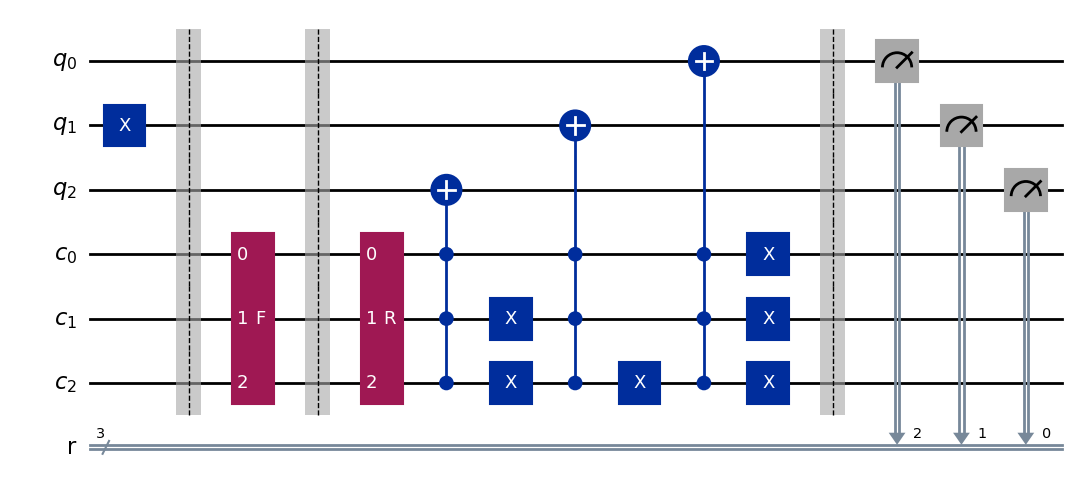

In [45]:
# Test circuit drawing
qw_h.draw_circuit()

In [46]:
# Test probability distribution
print("Probability distribution:")
probs = qw_h.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
000: 0.0193
010: 0.2501
110: 0.1075
011: 0.6231


As we can see afrom the above results, with a low number of steps, the quantum walk exhibits a bias toward the initialization state, making it unsuitable for implementing a secure QKD protocol. 😢

In [47]:
# Test probability distribution with a higher number of steps
qw_h = QW_Hypercube(P=3, t=900, initial_position=2, F='Y',
                    coin_type='generic_rotation', phi=0, theta=np.pi/4)
print("Probability distribution:")
probs = qw_h.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
100: 0.0476
110: 0.2300
001: 0.0452
101: 0.0615
000: 0.0953
010: 0.2154
111: 0.1409
011: 0.1641


As observed above, increasing the number of steps results in a less biased probability distribution, which is an ideal outcome. This demonstrates that the approach is effective for designing quantum walks suitable for a secure QKD protocol. ✅

Now, consider the scenario where the coin is defined as a Grover coin. In this case, the results are less favorable compared to the rotation coin. As observed earlier, the Grover coin theoretically produces a more biased distribution, making it challenging to achieve uniformity without significantly increasing $t$ in our simulations.

In [48]:
# Test QW on a hypercube with 2^{P} vertices (grover coin)
qw_h = QW_Hypercube(P=3, t=1, initial_position=2, coin_type='grover')

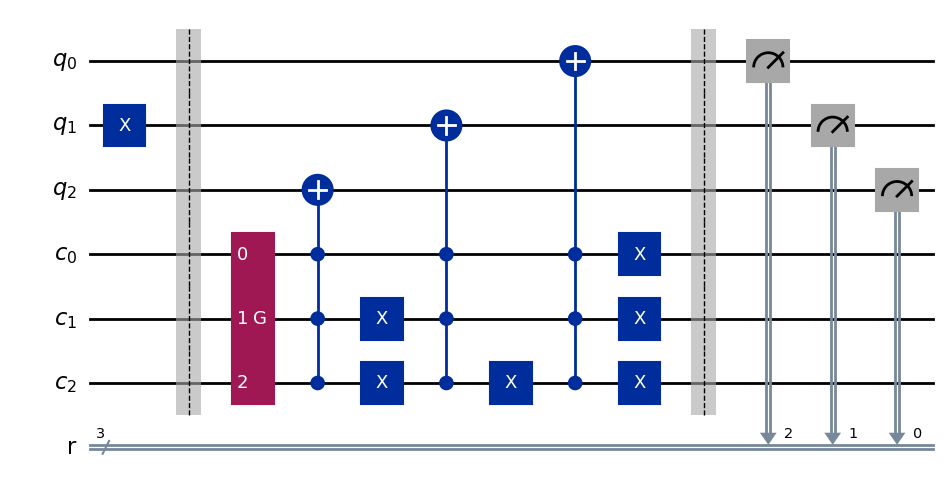

In [49]:
# Test circuit drawing
qw_h.draw_circuit()

In [50]:
# Test probability distribution
print("Probability distribution:")
probs = qw_h.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
110: 0.0627
011: 0.0630
000: 0.0621
010: 0.8122


From the results presented above, it is evident that the Grover coin introduces significant bias, rendering it impractical for use in QKD protocols. However, let us examine its behavior over a large number of steps.

In [51]:
# Test probability distribution with a higher number of steps
qw_h = QW_Hypercube(P=3, t=900, initial_position=2, coin_type='grover')
print("Probability distribution:")
probs = qw_h.get_probabilities(shots=shots)
for state, prob in probs.items():
    print(f"{state}: {prob:.4f}")

Probability distribution:
110: 0.0358
100: 0.0382
101: 0.0606
011: 0.0387
111: 0.0388
001: 0.0358
000: 0.0380
010: 0.7142


Even if the bias is smaller, it remains significant compared to the probabilities of states other than the initialization state. This indicates that this type of quantum walk on hypercubes is unsuitable for constructing a secure QKD protocol. Theoretically, with $P = 1$, we should achieve the minimum value of $c = 0.5$, where $c = \max_{x,y} |\alpha_{x, y}|^2$, as the protocol simplifies to BB84. For larger $P$, $c$ should approach zero as $P$ increases, given a reasonably small number of iterations. However, using a Grover coin with QW on hypercubes ensures that even as $P$ increases, the maximum value of $c$ will remain at $0.5$. In other words, as $P$ grows, the protocol combining QW on hypercubes using the Grover coin is equivalent (in terms of $c$ security analysis) to a BB84 protocol. 🤯

Next, we can conduct a similar analysis over a range of $P$ values from $1$ to $13$ (due to the limitations of the
`AerSimulator` in terms of its qubits' capacity) to evaluate the security parameter $c$ as a function of $P$. Specifically, we aim to examine how the topology affects $c$, taking into account the exponential growth in the number of vertices and its impact on circuit complexity. In addition, the previous demonstration of the QKD protocol's security on circles also applies to hypercubes, with only minor adjustments, as outlined below.

The equivalence between entanglement-based and prepare-and-measure QKD protocols was first introduced by [C. H. Bennett et alt.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.68.557). Since then, the relationship between entanglement—particularly its certification or distillation—and the security of prepare-and-measure QKD protocols has been extensively studied. A common approach to proving the security of prepare-and-measure QKD protocols, including those discussed here, is to consider an equivalent entanglement-based protocol.

Even when the devices are untrusted, as in device-independent QKD, security is maintained under specific assumptions about the devices. In the entanglement-based protocol, steps (1) and (2) of each of the $N$ iterations are modified as follows:

- **New step (1)**: Alice prepares the entangled state:
  $$
  \ket{\Psi_0} = \frac{1}{\sqrt{2^{P}}} \sum_{i=0}^{2^{P}-1} \ket{i, i}_{AB}
  $$

  which resides in a $2^{2P}$-dimensional Hilbert space, $(H_p \otimes H_c)^2$. Alice sends Bob the second half (the Bob portion) of $\ket{\Psi_0}$ while keeping the first half (the Alice portion) in her private lab;

- **New step (2)**: Alice and Bob independently choose two random bits, $w_A$ and $w_B$. If $w_A = 0$, Alice measures her half of the entangled state in the computational $Z$ basis; otherwise, she measures in the QW basis. Bob similarly measures his half according to $w_B$. Their measurement outcomes are recorded as $i_A$ for Alice and $j_B$ for Bob.

Next, we prove the security of this entanglement-based protocol by initially making three assumptions:

- $A_1$: Alice and Bob only use iterations where $w_A = w_B = 0$ for their raw key;
- $A_2$: Eve is limited to collective attacks, where she independently attacks each protocol iteration but can perform a joint measurement of her ancilla at any future time;
- $A_3$: Eve prepares the states that Alice and Bob hold.

Assumption $A_1$ simplifies computation and can be discarded later; alternatively, Alice and Bob may bias their basis choice to make $w_A = w_B = 0$ more likely, as done in the BB84 protocol. Assumption $A_2$ can be removed later using a de Finetti argument, yielding security in the asymptotic limit without degrading the key-rate. Assumption $A_3$ grants more power to Eve; if security is shown with $A_3$, it holds even when $A_3$ is removed.

Given $A_2$ and $A_3$, Alice, Bob, and Eve, after $N$ iterations, share a quantum state $\rho_{ABE}^N$, where $\rho_{ABE} \in H_A \otimes H_B \otimes H_E$ with $H_A \simeq H_B \simeq H_p \otimes H_c$. Eve, as an all-powerful adversary, has no constraints on her Hilbert space $H_E$. After error correction and privacy amplification, Alice and Bob share a secret key of size $\ell(N)$. Under collective attacks, the Devetak-Winter key-rate expression can compute:

$$
r = \lim_{N \to \infty} \frac{\ell(N)}{N} = S(A|E) - H(A|B)
$$

Let $A_z$ and $A_w$ be random variables representing Alice's system when measured in the $Z$ or QW basis, respectively, with $B_z$ and $B_w$ defined similarly for Bob. Under $A_1$, we seek:

$$
r = S(A_z|E) - H(A_z|B_z)
$$

Computing $H(A_z|B_z)$ is straightforward, given the probabilities:

$$
p_{i,j}^z = \mathbb{P}(i_A = i, \: j_B = j | w_A = w_B = 0)
$$

The challenge lies in bounding the von Neumann entropy $S(A_z|E)$. For this, we use an uncertainty relation from which, given any density operator $\rho_{ABE}$ on $H_A \otimes H_B \otimes H_E$, and measurements using POVMs $M_0 = \{ M_x^{(0)} \}_x$ or $M_1 = \{ M_x^{(1)} \}_x$:

$$
S(A_0|E) + H(A_1|B) \geq \log \frac{1}{c}
$$

where $c = \max_{x,y} \| M_x^{(0)} M_y^{(1)} \|_\infty^2$; we define $\| \cdot \|_\infty$ as the operator norm, with $A_i$ representing the random variable that describes Alice's system after applying the measurement $M_i$. We will define $B_i$ similarly for Bob's system. Assuming measurements $M_0$ are used for key distillation, provides the Devetak-Winter key rate:

$$
r = S(A_0|E) - H(A_0|B_0) \geq \log \frac{1}{c} - H(A_0|B_0) - H(A_1|B) \geq \log \frac{1}{c} - H(A_0|B_0) - H(A_1|B_1)
$$

This final inequality results from the fundamental fact that measurements can only increase entropy. In our scenario, we set $M^{(0)}_x = \ket{x} \bra{x}$ and $M^{(1)}_x = \ket{\tilde{x}} \bra{\tilde{x}}$ for $x \in \{0, 1, \dots, 2^{P} - 1\}$, where $\ket{\tilde{x}} = \sum_{i}\alpha_{x,i} \ket{i}$. Thus, for all $x, y$:

$$
\| M^{(0)}_x M^{(1)}_y \|_\infty = |\alpha_{x, y}|^2
$$

This results in:

$$
c = \max_{x,y} |\alpha_{x, y}|^2
$$

which depends only on the QW parameters and not on the channel noise. Therefore, Alice and Bob should choose optimal values for $t$, $\theta$, and $P$ to minimize $c$, thereby maximizing the key rate.

Similar to the circle topology, we will investigate different walk parameters to determine the minimum value of $c$, beginning with $F = I_c$, the identity operator. It's important to note that also for hypercubes, odd values of $P$ are typically preferred, as even values of $P$ restrict the probability amplitudes to either even or odd nodes, which increases $|\alpha_{x, y}|$. The results of these simulations are available in our [GitHub](https://github.com/werefin/1W-QKD-Quantum-Random-Walks/) repository.